This notebook provides a simple simulation of phyllotaxis based on the "inhibitory field" model.

The inflorescence meristem peripheral zone is modeled by just a circle with a single value on each discretized point of the circle's perimeter. This is abstract and will just be called "value" since it is the only one. The simulation abides by the following rules:

1. After one time step (plastochron) elapses, a new flower is initiated at the global minimum of the circle (the point on the perimeter with the lowest "value")

2. New flowers immediately increase the value at their specific location by 1. They also increase the values of all other points on the circle by means of an exponentially decaying function based on distance and time. That is to say, points near the flower also experience a lesser increase in value, and over time, the "boost" of an individual flower gets weaker and weaker.

3. An initial flower location can be chosen, and multiple flower locations can be forced for the first X intervals.

With these requirements alone, we can see that over enough cycles, flowers are typically placed at the "golden angle" relative to each other, following the maximum packing rule. This makes sense intuitively because by creating a flower at the farthest distance from the effects of all previous flowers, we are packing them in as closely as possible.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (5,5)

In [131]:
#Initialize vector of time values, specify end point and step interval
start = 0 #keep this at 0
stop = 50
step = 1
time = np.arange(start,stop+step,step)

#Create vector for discrete angles around the circle, choose number of increments for varied resolution
theta = np.linspace(0,2*math.pi,num=1000)

In [132]:
#Position(s) of initial pre-loaded "flower(s)"
source_thetas = [1]

#This coefficient determines how quickly values decay over time. Higher number for faster.
decay_coef = 1.6

#Initialize a vector for the values
values = np.zeros(theta.shape)
angle_diffs = []

for t in time:
    #We always clear the values vector and rebuild it based on our stored history of flowers, called "source_thetas"
    values *= 0
    
    #Go through our list of flower locations. On the first pass, this will get the pre-loaded flower(s).
    for i,x in enumerate(source_thetas):
        if t >= i:
            #Each pre-loaded flower gets its effects added at its own plastochron. So at t=0, the first pre-loaded flower is added
            #The decay coefficient is multiplied by 0 when t = i (when the flower is just being introduced) so the new flower gets 1 added to its location
            #In future passes, each new flower is added to source_thetas and each current effect is calculated and added here.
            values += np.exp(-1 * np.sqrt((np.cos(theta)-math.cos(x))**2 + (np.sin(theta)-math.sin(x))**2)) / (decay_coef*(t - i) + 1)

    #If we have reached a time step (completed a plastochron), it is time to decide where a new flower should go
    if t % 1 == 0:
        #Get the global minimum value and location on the circle
        min_th = np.argmin(values)
        min_v = np.min(values)
        
        #This is to make sure that it is time to add a new flower and we don't have any pre-loaded ones left to add first
        if t == len(source_thetas):
            
            source_thetas.append(theta[min_th])
            
            #Calculate the difference between this theta and the previous one, to plot later
            diff = source_thetas[-1] - source_thetas[-2]
            if diff > 0:
                angle_diffs.append(diff)
            else:
                angle_diffs.append(2*math.pi + diff)
                
            #Add the inital effect of this new flower (really only matters for plotting the circle since values gets cleared if the for loop continues)
            values += np.exp(-1 * np.sqrt((np.cos(theta)-math.cos(source_thetas[-1]))**2 + (np.sin(theta)-math.sin(source_thetas[-1]))**2))
        
        
    

    

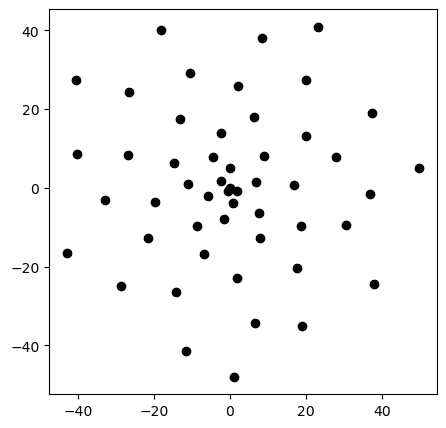

In [134]:
#Plot the flowers on an expanding circle to see where they are placed relative to each other,
#and get a sense of the forming spiral
for t in time:
    plt.scatter(t*np.cos(source_thetas[t]),t*np.sin(source_thetas[t]), color='k')
plt.show()

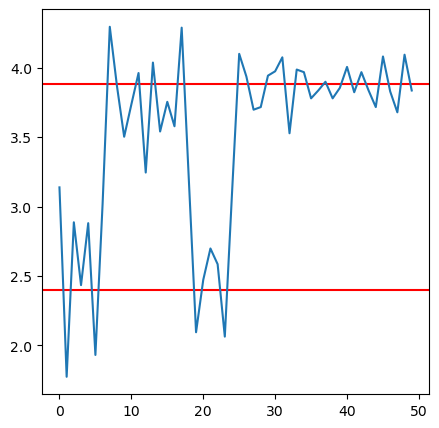

In [140]:
#Plot the angle differences to see how consistent they are

#First I want to add to red horizontal lines to show where the golden angle phyllotaxis would be.
#137.5 degrees. ~ 2.4 radians. But if some flip happens and it starts going clockwise, it will look like the
#angle is changing by 222.5 degrees instead (~3.88 radians). So both are marked.
plt.axhline(y = 2.4, color = 'r', linestyle = '-')
plt.axhline(y = 3.88, color = 'r', linestyle = '-')

plt.plot(angle_diffs)
plt.show()

In [144]:
#Calculate the mean angle difference of the last X flowers in radians and degrees'
last_flowers = 10
m = np.mean(angle_diffs[(-1 * last_flowers):])
print(m)
n = m * 180 / math.pi
print(n)

3.887524362730433
222.73873873873873


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2.,
        0., 0., 2., 1., 1., 2., 0., 3., 2., 0., 1., 3., 6., 9., 9., 5., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0. ,   7.2,  14.4,  21.6,  28.8,  36. ,  43.2,  50.4,  57.6,
         64.8,  72. ,  79.2,  86.4,  93.6, 100.8, 108. , 115.2, 122.4,
        129.6, 136.8, 144. , 151.2, 158.4, 165.6, 172.8, 180. , 187.2,
        194.4, 201.6, 208.8, 216. , 223.2, 230.4, 237.6, 244.8, 252. ,
        259.2, 266.4, 273.6, 280.8, 288. , 295.2, 302.4, 309.6, 316.8,
        324. , 331.2, 338.4, 345.6, 352.8, 360. ]),
 <BarContainer object of 50 artists>)

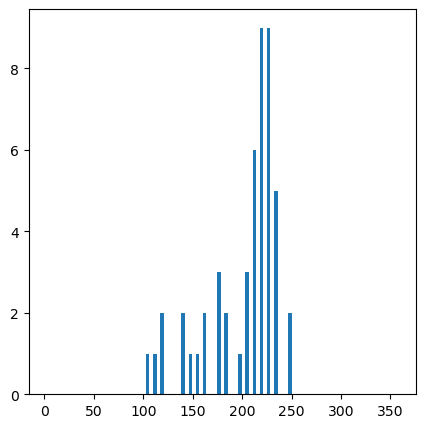

In [145]:
#Plot a histogram of the angle differences, in degrees
angle_diffs_deg = (np.array(angle_diffs) * 180) / math.pi
plt.hist(angle_diffs_deg, bins=50, range=(0,360), rwidth=0.5)

In [125]:
#The "true" value of the golden angle in radians (very close to 2.4)
(1 / ((math.sqrt(5) + 1) / 2)**2) * 2 * math.pi

2.399963229728653

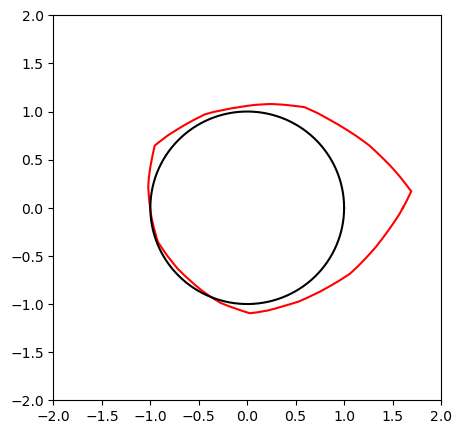

In [151]:
#Plot the current state of the values vector over a circle with radius 1.

x_vals = np.zeros(theta.shape)
y_vals = np.zeros(theta.shape)

x_uc = np.zeros(theta.shape)
y_uc = np.zeros(theta.shape)

for i,h in enumerate(theta):
    x_vals[i] = values[i] * np.cos(h)
    y_vals[i] = values[i] * np.sin(h)
    x_uc[i] = np.cos(h)
    y_uc[i] = np.sin(h)
    
plt.plot(x_vals, y_vals, color='r')
plt.plot(x_uc, y_uc, color = 'k')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()